# Demand Forecasting Predictions 

* This notebook is for the capstone project for Udacitys Nanodegree - **Machine Learning Engineer**. More information about the project will be provided below. 

* To test the prediciton score, we will submit the predictions to the Kaggle competition by Walmart which the data originated from, see link [here](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview). 

![Walmart](https://nypost.com/wp-content/uploads/sites/2/2019/08/walmart-tesla.jpg?quality=80&strip=all&w=618&h=410&crop=1)

# Structure 

1. Background
2. Import libraries and set up Dataframes
3. Explore the Data
4. Create models
5. Test models
6. Summary of Results

## 1.1 Background of the Data & Potential End Results

#### 1.1.1 Supply Chain Management & Demand Forecasting 

Text

#### 1.1.2 The old way

Text

#### 1.1.3 The potential new way

Text

### 1.2 Risks / Limitations 

* MEH, more data than I initially estimated - "Neural networks usually need a larger quantity of data to train on, therefore we will have this in mind when we assess the final results for the depand predicitons. "


### 1.3 The hypothesis 

* The more advanced NN will provide better forecasting, but not in a significant way, given the limitations of these models addressed above. 


# 2.1 - Import Libraries & Set up Data

* In this section we will import the nessessary libraries and the data from kaggle.com. Link to dataset [here](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview).

* We will then proceed and create dataframes (df's) that match each other, so we can try to answer the final question of **Predict the department-wide sales for each store**. 

![Kaggle](https://dox4euoyzny9u.cloudfront.net/images/blog/uploads/dataprocessinggdpr.jpg)

### Libraries to import

In [125]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Data to import

In [126]:
# Import data
df_f = pd.read_csv("data/features.csv")
df_st = pd.read_csv("data/stores.csv")
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")


# check the data
df_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [127]:
# Make date column into datetime
df_f["Date"] = pd.to_datetime(df_f["Date"])
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_test["Date"] = pd.to_datetime(df_test["Date"])

# Test if it works
print(df_train[0:1].Date, df_train[-1:].Date)
print(df_test[0:1].Date, df_test[-1:].Date)
print(df_f[0:1].Date, df_f[-1:].Date)

0   2010-02-05
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2012-11-02
Name: Date, dtype: datetime64[ns] 115063   2013-07-26
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [128]:
# Assess the total amount of columns and rows in a more consise way
print(df_f.shape)
print(df_train.shape)
print(df_test.shape)
print(df_st.shape)

(8190, 12)
(421570, 5)
(115064, 4)
(45, 3)


##### What do we know about our data so far?
* So we can see we are working with over 421 570 rows of data in the train dataframe, over 5 columns. This looks like it's this large due to the fact of the 45 different stores. 

* Moreover, for our test data we have 115 063 rows of data over 5 columns. 


* Then we have 8190 rows of data over 12 different columns in the Features dataframe. 

* Finally we have 45 rows of data over 3 columns in the stores dataframe. 

***Next** we will proceed to address the NaN values we could identify in the .head() formula above.*

### Merge data into 1 DataFrame

We do this to get some assistance in assessing the features and the time when we proceed with the modeling. 

In [129]:
# Merging training data
df_all_train = df_train.merge(df_f, how="left", on=["Store","Date","IsHoliday"])
#df_all_train.head(3)

# Merging test data
df_all_test = df_test.merge(df_f, how="left", on=["Store","Date","IsHoliday"])
df_all_test.head(3)


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2012-11-09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.1,103.78,1133.15,6612.69,223.512911,6.573


In [130]:
# More merging of training data
df_all_train = df_all_train.merge(df_st, how="left", on=["Store"])
df_all_train.head(3)

# More merging of test data
df_all_test = df_all_test.merge(df_st, how="left", on=["Store"])
#df_all_test.head(3)


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2012-11-09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.1,103.78,1133.15,6612.69,223.512911,6.573,A,151315


In [131]:
# Check how our final df_all_train looks
print("Rows & Columns: ", df_all_train.shape, "\nAll columns if the df: ", df_all.columns.tolist())

# # Check how our final df_all_test looks
print("Rows & Columns: ", df_all_test.shape, "\nAll columns if the df: ", df_all.columns.tolist())


Rows & Columns:  (421570, 16) 
All columns if the df:  ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']
Rows & Columns:  (115064, 15) 
All columns if the df:  ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


### What is in our new *df_all* dataframe?

* **What is included?** All columns from the three original files are now in the same dataframe, being; *'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'*
* **Why do it this way?** We got everything in the same df now to proceed to fix NaN values etc to keep everything at the same place. If we need specific columns, we don't need to go through specific files, we have everything at the same place, which makes it easier to keep in check. 

In [132]:
df_all_train = df_all_train.applymap(lambda x: 1 if x == True else x)
df_all_train = df_all_train.applymap(lambda x: 0 if x == False else x)

df_all_test = df_all_test.applymap(lambda x: 1 if x == True else x)
df_all_test = df_all_test.applymap(lambda x: 0 if x == False else x)

In [133]:
df_all_train.head(3)
#df_all_test.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2012-11-09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.1,103.78,1133.15,6612.69,223.512911,6.573,A,151315


### Deal with NaN values 

In [134]:
# Replace NaN values with 0
df_all_train = df_all_train.fillna(0)
df_all_test = df_all_test.fillna(0)

In [135]:
# Check NaN values in df_all_train

tab_info = pd.DataFrame(df_all_train.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(df_all.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df_all.isnull().sum()/df_all_train.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# Check NaN values in df_all_test

tab_info = pd.DataFrame(df_all_test.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(df_all.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df_all.isnull().sum()/df_all_test.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
column Type,int64,int64,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64,NaN
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


### Exploring the training data

Ways we will explore the data 
- .describe() function - general overview
- General plots for the different features
- Get average weekly sales for each store/department
- plot of sales 
- correlation heatmap

In [121]:
# Start with simple .describe() to get the general jist of the dataframe
df_all_train.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,40.232498,2.269129,1741.105906,836.721983,436.075567,714.599910,1077.072079,115.036421,5.330181,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,31.864943,1.629949,5233.469121,5062.933330,5501.323559,3498.770639,3291.952301,86.675206,4.029389,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,0.000000,0.000000,0.000000,-265.760000,-1.000000,0.000000,0.000000,0.000000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,47.410000,2.980000,0.000000,0.000000,0.000000,0.000000,0.000000,132.293936,6.891000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,68.270000,3.611000,82.230000,0.000000,0.000000,0.000000,597.940000,198.100106,8.200000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.449000,88646.760000,104519.540000,141630.610000,67474.850000,105223.110000,227.232807,14.313000,219622.000000


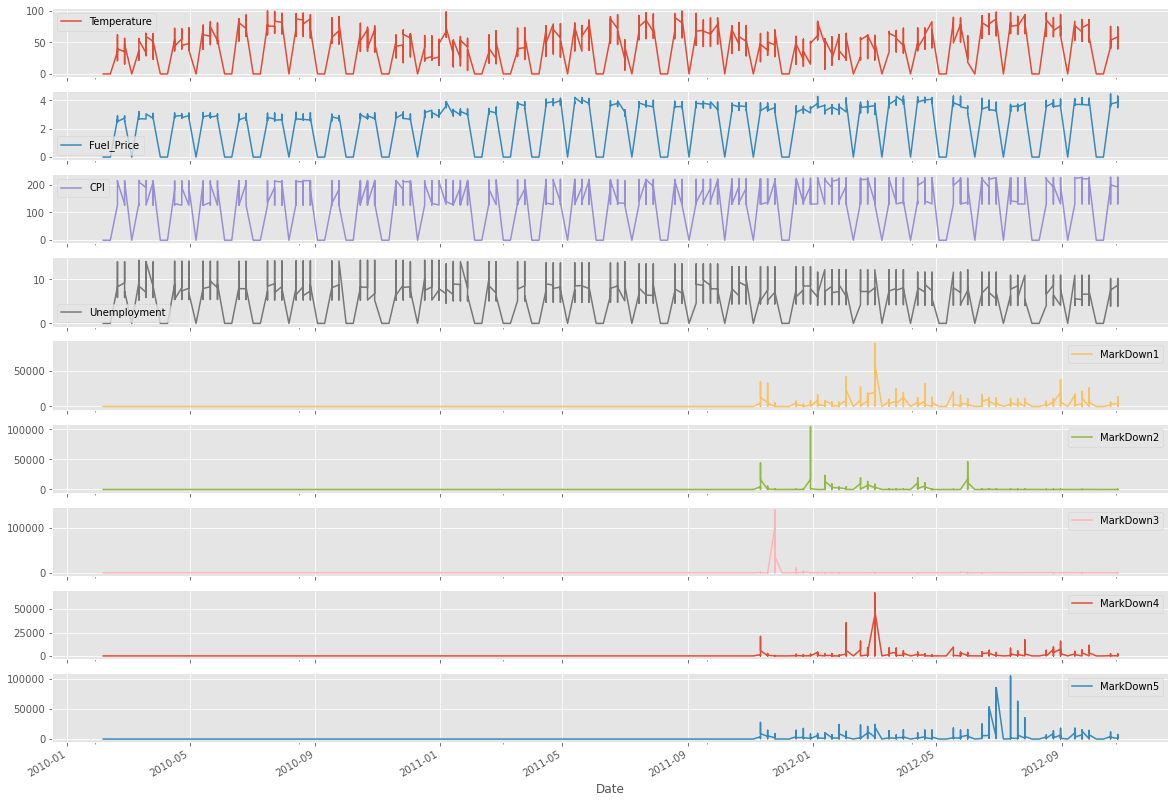

In [122]:
# Plots for the different features in the df: 
df_all_train[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))

plt.show()

### *General comments about the graphs*

* **Discounts**: From taking a quick look at the graphs, it seems like the discounts are a more recent thing appearing in the end of 2011 with the exception of the potential test of 2011-02 where we find a small bump on all discount levels.

### Weekly sales plot

<function matplotlib.pyplot.show(*args, **kw)>

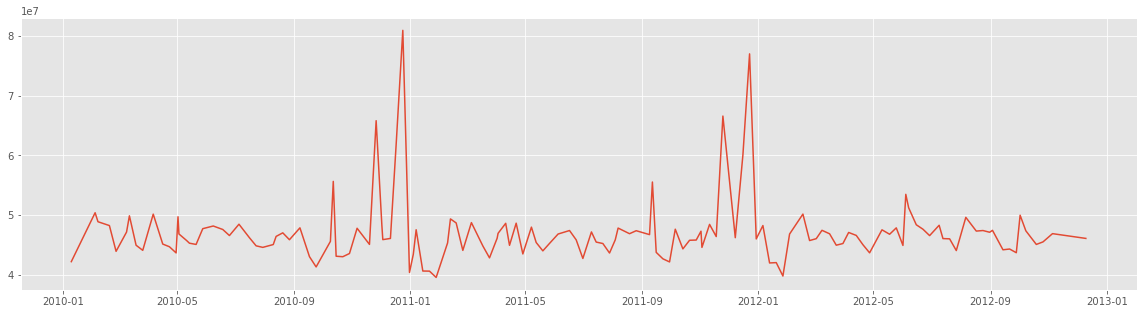

In [82]:
# Average weekly sales for the stores/departments during a week
df_average_sales_weekly = df_all_train.groupby(by=["Date"], as_index = False)["Weekly_Sales"].sum()

df_average_sales = df_average_sales_weekly.sort_values("Weekly_Sales", ascending=False)

#print(df_average_sales[:10])

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_weekly.Date, df_average_sales_weekly.Weekly_Sales)
plt.show

### *General comments about the graph* 

* **Seasonality - *High-Point***: It seems there are some seasonality to our data, where the end of December seems like a popular time to buy our company's specific products. Hy theory is that this has to do with the holidays and people buy gifts for each other, which seems reasonable. 
* **Seasonality - *Low-Point***: Around the end of january it seems to be a pretty steep dip in the different stores sales both during 2011 and 2012. 

### Correlation heat map

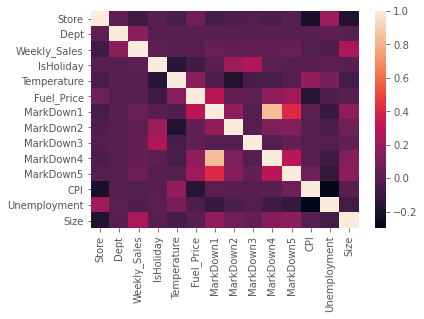

In [83]:
# Correlation between all features
sns.heatmap(df_all.corr())

In [93]:
# Correlation between Weekly Sales and all other features
df_sales_corr = df_all[df_all.columns[1:]].corr()['Weekly_Sales'][:]
df_sales_corr

Dept            0.148032
Weekly_Sales    1.000000
IsHoliday       0.012774
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.047172
MarkDown2       0.020716
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown5       0.050465
CPI            -0.020921
Unemployment   -0.025864
Size            0.243828
Name: Weekly_Sales, dtype: float64

In [94]:
# Plot the correlation 



### General comments about the graph
The correlation table and graph indicate a few things: 
* **MarkDown4**: Largest positive effect on weekly sales. As a reminder, the MarkDown4 was when 
* 